In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [28]:
df = pd.read_csv('/home/erfan/Downloads/archive(2)/comptagesvelo2015.csv')
df.tail(40)

,Date,Unnamed: 1,Berri1,Boyer,Brébeuf,CSC (Côte Sainte-Catherine),Maisonneuve_1,Maisonneuve_2,Maisonneuve_3,Notre-Dame,...,Pont_Jacques_Cartier,Rachel / Hôtel de Ville,Rachel / Papineau,René-Lévesque,Saint-Antoine,Saint-Laurent U-Zelt Test,Saint-Urbain,Totem_Laurier,University,Viger
279,07/10/2015,00:00,4943,3021,4555,2314,NaN,49,1769,1761,...,1962.0,3393,4493,1935,564,7022.0,2202,2260,4206,533
280,08/10/2015,00:00,4710,2943,4466,2126,NaN,316,1786,1656,...,1810.0,3355,4335,2031,514,6786.0,2129,2026,4115,523
281,09/10/2015,00:00,1538,938,1486,682,NaN,260,574,477,...,566.0,1367,1872,642,191,2805.0,932,1057,1421,156
282,10/10/2015,00:00,1653,1437,1904,571,NaN,291,571,488,...,999.0,2043,2384,659,159,3155.0,966,1204,1094,124
283,11/10/2015,00:00,1574,1436,1733,585,NaN,162,567,492,...,1010.0,1811,2121,644,126,2643.0,787,1015,936,139
284,12/10/2015,00:00,2592,2611,3105,1029,NaN,327,1058,1194,...,2198.0,3013,3561,1518,223,4086.0,1051,1437,1220,213
285,13/10/2015,00:00,3457,1767,3065,1500,NaN,211,1286,1178,...,1257.0,2249,3125,1457,362,4993.0,1507,1460,2965,410
286,14/10/2015,00:00,4321,2407,3875,1909,NaN,380,1501,1417,...,1563.0,2895,3667,1836,530,6346.0,1748,1801,3924,454
287,15/10/2015,00:00,3583,2047,3274,1484,NaN,89,1075,1040,...,1221.0,2369,3169,1422,379,6386.0,1670,1583,3043,394
288,16/10/2015,00:00,3424,2031,3144,1294,NaN,266,1187,966,...,1092.0,2568,3271,1317,443,5665.0,1598,1698,2984,331


In [29]:
df.columns

Index(['Date', 'Unnamed: 1', 'Berri1', 'Boyer', 'Brébeuf',
       'CSC (Côte Sainte-Catherine)', 'Maisonneuve_1', 'Maisonneuve_2',
       'Maisonneuve_3', 'Notre-Dame', 'Parc', 'Parc U-Zelt Test', 'PierDup',
       'Pont_Jacques_Cartier', 'Rachel / Hôtel de Ville', 'Rachel / Papineau',
       'René-Lévesque', 'Saint-Antoine', 'Saint-Laurent U-Zelt Test',
       'Saint-Urbain', 'Totem_Laurier', 'University', 'Viger'],
      dtype='object')

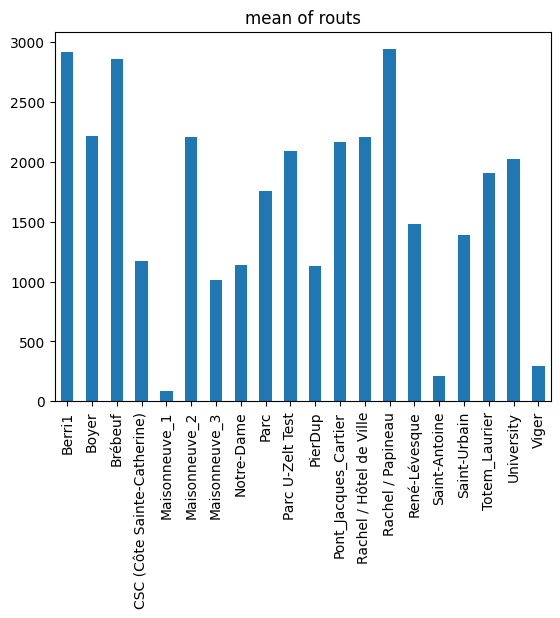

In [30]:
df_of_routs = df[['Berri1', 'Boyer', 'Brébeuf',
       'CSC (Côte Sainte-Catherine)', 'Maisonneuve_1', 'Maisonneuve_2',
       'Maisonneuve_3', 'Notre-Dame', 'Parc', 'Parc U-Zelt Test', 'PierDup',
       'Pont_Jacques_Cartier', 'Rachel / Hôtel de Ville', 'Rachel / Papineau',
       'René-Lévesque', 'Saint-Antoine',
       'Saint-Urbain', 'Totem_Laurier', 'University', 'Viger']]
df_of_routs.mean().plot(kind='bar').set_title('mean of routs');plt.show()

In [116]:
def standardize(x):
    mean = np.mean(x)
    std = np.std(x)
    x_standardized = (x - mean) / std
    return x_standardized, mean, std

def apply_standardization(x, mean, std):
    return (x - mean) / std

In [166]:
def create_polynomial_features(df, column_name, degree):
    x_standardized, mean, std = standardize(df[column_name])
    x = np.array(x_standardized)
    X = np.ones((x.shape[0], degree + 1))
    for i in range(1, degree + 1):
        X[:, i] = x_standardized ** i
    return X, mean, std

x, mean, std = create_polynomial_features(df, 'Berri1', 7)
x.shape

(319, 8)

In [195]:
def polynomial_regression(df, column_name, degree, learning_rate=0.001, epochs=100, print_interval=100, regularization=5):
    X_poly, mean, std = create_polynomial_features(df, column_name, degree)
    y = df[column_name]
    m = len(y)
    
    # Initialize weights with zeros array of np
    b = np.zeros(X_poly.shape[1])
    
    # Gradient descent method
    for epoch in range(epochs):
        predictions = np.dot(X_poly, b)
        errors = predictions - y
        
        # Gradient with regularization
        gradient = (1/m) * np.dot(X_poly.T, errors)
        
        # Update weights
        b -= learning_rate * gradient
        
        # Compute L1 and L2 cost
        L1_cost = np.mean(np.abs(errors))
        L2_cost = np.mean(errors ** 2) + regularization * np.sum(b ** 2)
        
        if epoch % print_interval == 0:
            print(f"Epoch {epoch}, L1 Cost: {L1_cost:.4f}, L2 Cost: {L2_cost:.4f}")
    
    return b

In [176]:
def predict_polynomial_regression(x, b):
    X_poly = (x - np.mean(x)) / np.std(x)
    return np.dot(x, b)

In [202]:
# 3 routs with biggest mean are: Berri1, Brébeuf and Rachel / Papineau:

# train a model for Berri1:

degree = 7

coefficients = polynomial_regression(df, 'Berri1', degree)

X, mean, std = create_polynomial_features(df, 'Berri1', degree)

y_pred = predict_polynomial_regression(X, coefficients)

Epoch 0, L1 Cost: 2915.3981, L2 Cost: 13670504.2456


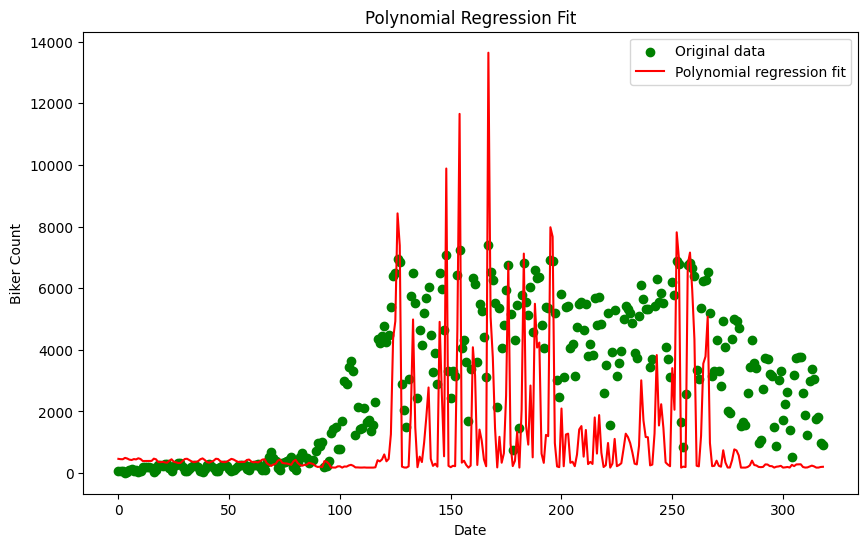

In [203]:
plt.figure(figsize=(10, 6))
plt.scatter(df.index, df['Berri1'], color='green', label='Original data')
plt.plot(df.index, y_pred, color='red', label='Polynomial regression fit')
plt.title('Polynomial Regression Fit')
plt.xlabel('Date')
plt.ylabel('Biker Count')
plt.legend()
plt.show()